In [1]:
import os
import sys
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path().resolve().parent))
from train.datasets import TitsSizeDataset

In [2]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [4]:
meta_path = '/home/achernikov/DATA/datasets/tits_size/tits_size.json'
root_path = '/home/achernikov/DATA/segmentation_tits_size'

In [5]:
with open(meta_path) as f:
    data = json.load(f)
orig_df = pd.read_json(data['data'])
print(orig_df.columns)

Index(['path', 'big tits', 'flat chested', 'huge tits', 'small tits'], dtype='object')


/tmp/ipykernel_674043/4139273035.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  orig_df = pd.read_json(data['data'])


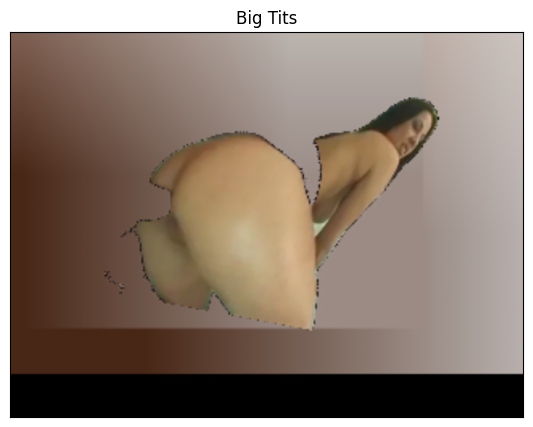

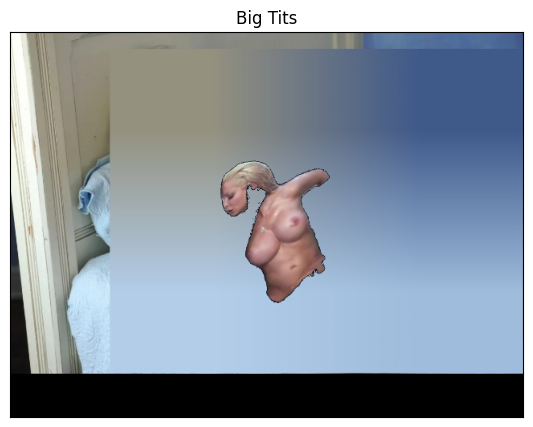

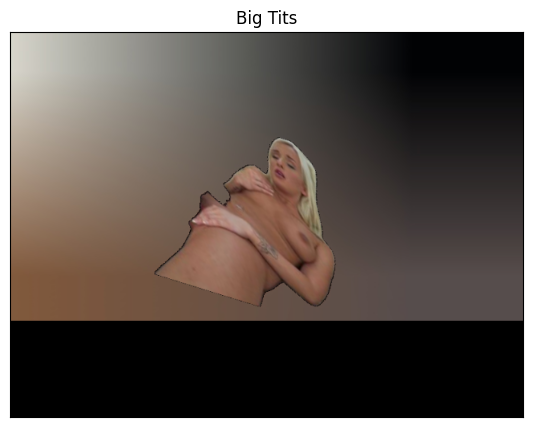

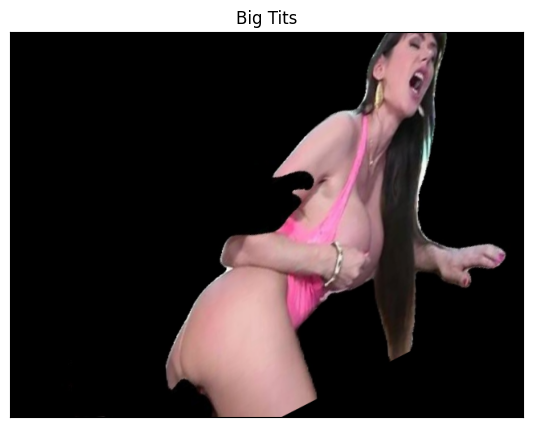

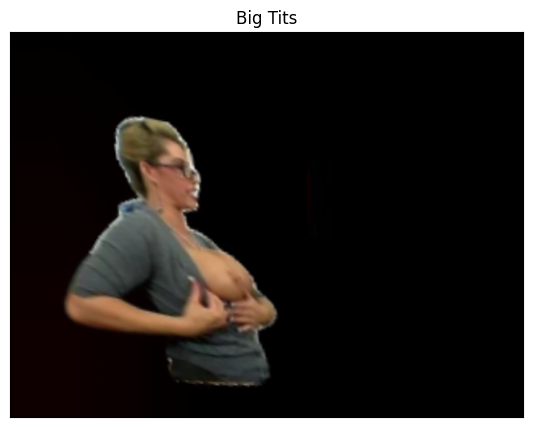

In [24]:
df = orig_df[orig_df['big tits'] == 1]

ds = TitsSizeDataset(data=df, root=root_path)
names = ds.data.columns.tolist()[1:]

for i in range(5):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

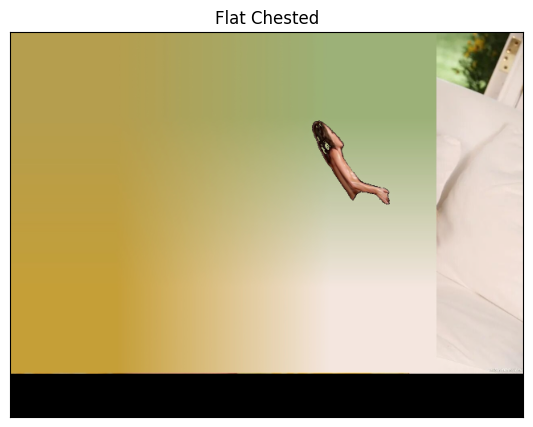

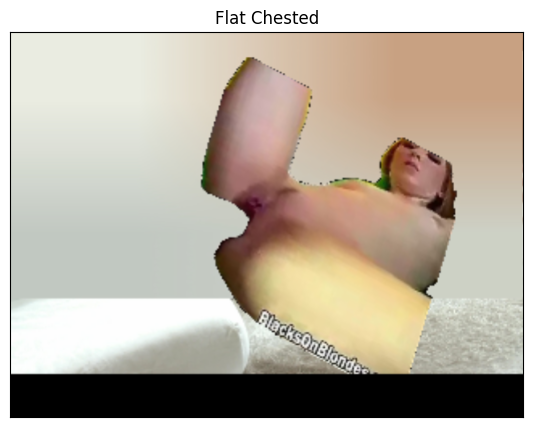

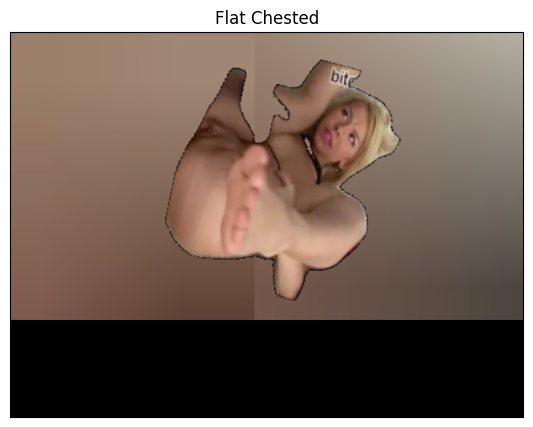

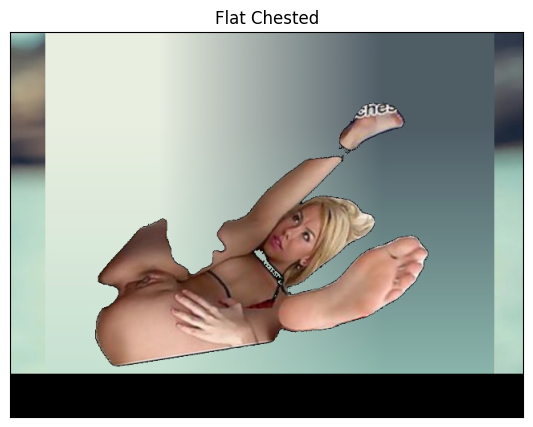

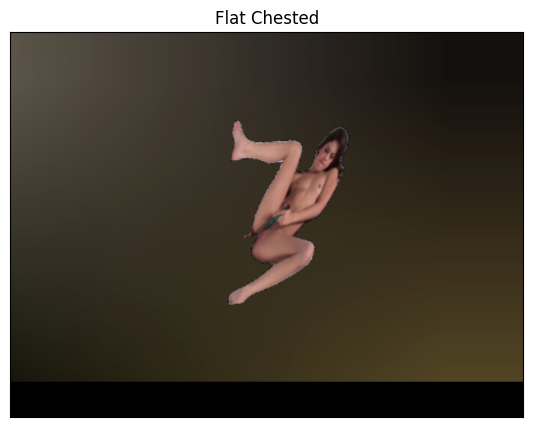

In [6]:
df = orig_df[orig_df['flat chested'] == 1]

ds = TitsSizeDataset(data=df, root=root_path)
names = ds.data.columns.tolist()[1:]

for i in range(5):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

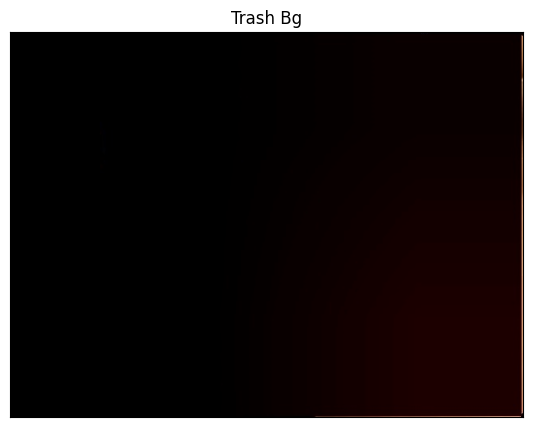

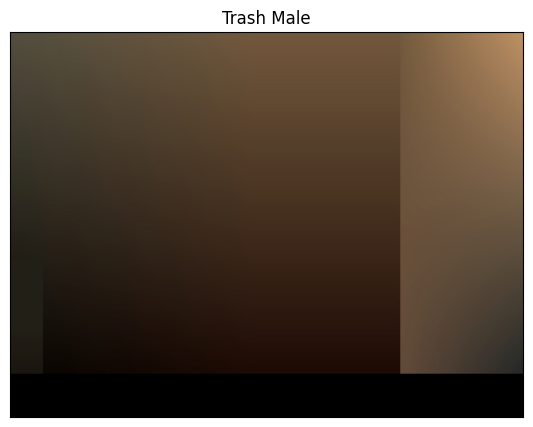

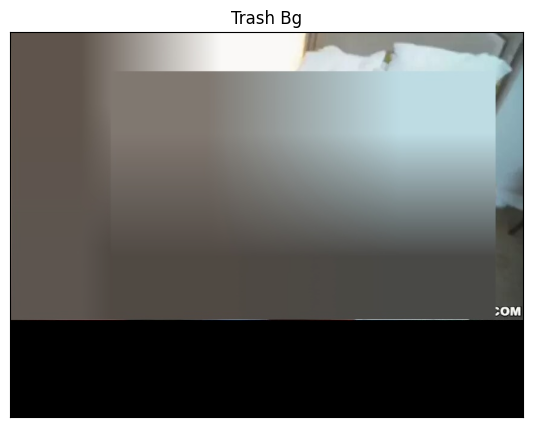

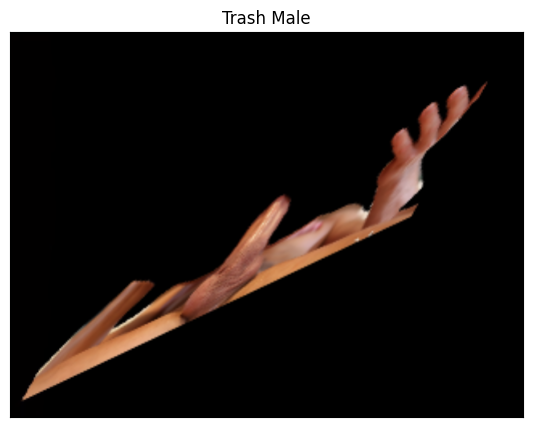

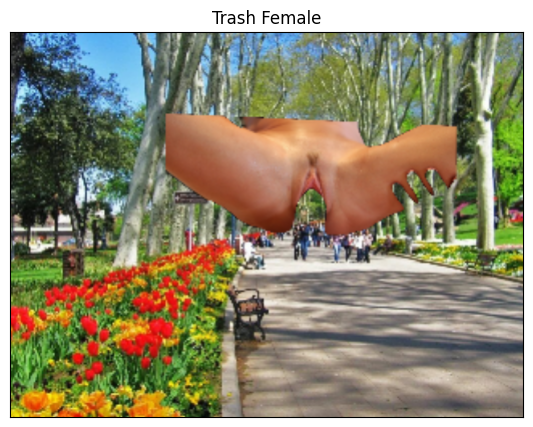

In [7]:
import numpy as np

trash_mask = np.ones((len(orig_df),), dtype='bool')
cols = orig_df.columns.tolist()

for i in range(1, len(cols)):
    col = cols[i]
    trash_mask &= (orig_df[col] == 0).values
trash_data = orig_df[trash_mask]

ds = TitsSizeDataset(data=trash_data, root=root_path)
names = ds.data.columns.tolist()[1:]

for i in range(5):
    img, label = ds[i]
    cls_idx = label.argmax()
    name = names[cls_idx]
    img = img.permute(1, 2, 0).float().numpy()
    visualize(**{name: img})

In [32]:
import pandas as pd
import json
with open('/home/achernikov/DATA/datasets/sex_position/sex_positions.json') as f:
    data = json.load(f)
df = pd.read_json(data['data'])
df

/tmp/ipykernel_641273/3361456017.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data['data'])


0        c65e5cc8ce4b232c3b39411b09fc57f0.jpeg
1        80279792ae8f037bc51e1f2386487998.jpeg
2        29e94c8fc081153e6681c96a4df7a63f.jpeg
3        25e87340b207e071bbcfa3618599a00f.jpeg
4        8a4b2f38811cd3a606ed929b2a6ff0cb.jpeg
                         ...                  
27776    e6efbc00845bca88ee25f84b11a70fcc.jpeg
27777    ee223f3f6c90a675b680e4b640d445d3.jpeg
27778    867ee36efa23c356732ad9745b51d150.jpeg
27779    9618b6f63230d42764f37f01d5cd13d1.jpeg
27780    a0abeed2e36707df7477c82016c2e26a.jpeg
Name: path, Length: 27781, dtype: object

In [28]:
import numpy as np

mask = np.ones((len(df),), dtype='bool')
cols = df.columns.tolist()
cur_class = -1
for i in range(1, len(cols)):
    col = cols[i]
    value = 1 if (i - 1) == cur_class and cur_class >= 0 else 0
    mask &= (df[col] == value).values

df[mask].index

Index([10902, 10903, 10904, 10905, 10906, 10907, 10908, 10909, 10910, 10911,
       ...
       24376, 24377, 24378, 24379, 24380, 24381, 24382, 24383, 24384, 24385],
      dtype='int64', length=13484)

In [42]:
df = pd.DataFrame([{'a': '1', 'b': 1}, {'a': '2', 'b': 1}])


df.index = df[df.columns[0]]
badlist = ['-1', '1']
clear_badlist = []
for b in badlist:
    if b in df.index:
        clear_badlist.append(b)

print(clear_badlist)

d2 = df.drop(clear_badlist)
df

['1']


,a,b
a,,
1,1,1
2,2,1
